In [8]:
import torch 
import torch.nn as nn 
from pprint import pprint
from src.device import select_device 
from src.testtrain import train, test
from src.data import fetch_dataset, dataloader
from src.models.mlp import MLP 
from src.models.linear import Linear
from src.regularizers import * 
from src.metrics import * 
import matplotlib.pyplot as plt 

torch.manual_seed(0)

device = select_device()

training_data, test_data = fetch_dataset("MNIST", verbose=False)

train_dataloader, test_dataloader = dataloader(
    training_data, test_data, 
    batch_size=-1
)

epochs = 100

In [11]:
# L1 with Soft Thresholding
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 1e-1, 0., 0.
train_losses2, test_losses2 = [], []
test_accuracy2, PQIs2, l0_2 = [], [], []

for t in range(epochs): 
    print(f"Epoch {t+1}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, soft_thresh = True)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses2.append(train_dict["loss"])
    test_losses2.append(test_dict["loss"])
    test_accuracy2.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs2.append(1 - pqi_)
    l0_2.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")

Epoch 1
-------------------------------
loss: 2.333761  [60000/60000]
Test Error: 
 Accuracy: 10.6%, Avg loss: 2.329725 

'L0 Sparsity : 0.1910828025477707%'
'PQ Sparsity : 0.13502264022827148'
Epoch 2
-------------------------------
loss: 2.320532  [60000/60000]
Test Error: 
 Accuracy: 11.6%, Avg loss: 2.304769 

'L0 Sparsity : 0.3949044585987261%'
'PQ Sparsity : 0.13623535633087158'
Epoch 3
-------------------------------
loss: 2.296277  [60000/60000]
Test Error: 
 Accuracy: 13.5%, Avg loss: 2.270383 

'L0 Sparsity : 0.6751592356687898%'
'PQ Sparsity : 0.13744080066680908'
Epoch 4
-------------------------------
loss: 2.262845  [60000/60000]
Test Error: 
 Accuracy: 15.6%, Avg loss: 2.228146 

'L0 Sparsity : 0.9681528662420382%'
'PQ Sparsity : 0.13864237070083618'
Epoch 5
-------------------------------
loss: 2.221761  [60000/60000]
Test Error: 
 Accuracy: 18.7%, Avg loss: 2.179801 

'L0 Sparsity : 1.070063694267516%'
'PQ Sparsity : 0.1398351788520813'
Epoch 6
------------------------

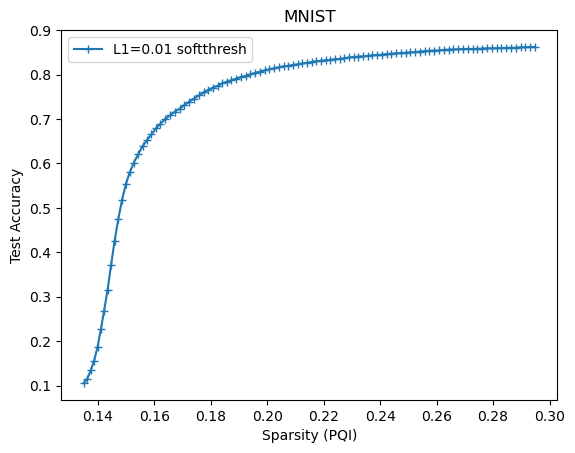

In [12]:
plt.plot(PQIs2, test_accuracy2, marker="+", label="L1=0.01 softthresh")
plt.xlabel("Sparsity (PQI)")
plt.ylabel("Test Accuracy")
plt.title("MNIST")
plt.legend()
plt.show() 

In [16]:
  # L1 with Proximal LBFGS Optimizer
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 1e-1, 0., 0.
train_losses3, test_losses3 = [], []
test_accuracy3, PQIs3, l0_3 = [], [], []

for t in range(epochs): 
    print(f"Epoch {t+1}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, soft_thresh = False)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses3.append(train_dict["loss"])
    test_losses3.append(test_dict["loss"])
    test_accuracy3.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs3.append(1 - pqi_)
    l0_3.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")
    
# PQI = 1 with LBFGS Proximal Optimizer
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

Epoch 1
-------------------------------
loss: 2.426204  [60000/60000]
Test Error: 
 Accuracy: 13.2%, Avg loss: 2.414939 

'L0 Sparsity : 0.08917197452229299%'
'PQ Sparsity : 0.13475239276885986'
Epoch 2
-------------------------------
loss: 2.411249  [60000/60000]
Test Error: 
 Accuracy: 13.9%, Avg loss: 2.386914 

'L0 Sparsity : 0.21656050955414013%'
'PQ Sparsity : 0.1367112398147583'
Epoch 3
-------------------------------
loss: 2.383906  [60000/60000]
Test Error: 
 Accuracy: 14.8%, Avg loss: 2.347836 

'L0 Sparsity : 0.33121019108280253%'
'PQ Sparsity : 0.13958168029785156'
Epoch 4
-------------------------------
loss: 2.345764  [60000/60000]
Test Error: 
 Accuracy: 16.7%, Avg loss: 2.299817 

'L0 Sparsity : 0.2802547770700637%'
'PQ Sparsity : 0.14348971843719482'
Epoch 5
-------------------------------
loss: 2.298875  [60000/60000]
Test Error: 
 Accuracy: 18.7%, Avg loss: 2.245284 

'L0 Sparsity : 0.36942675159235666%'
'PQ Sparsity : 0.14802557229995728'
Epoch 6
-------------------

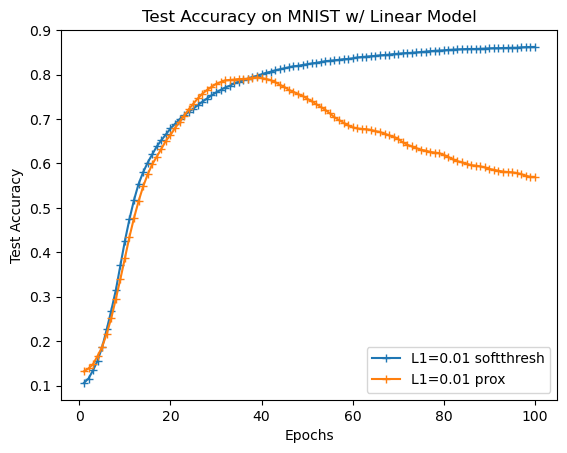

In [19]:
plt.plot(range(1, epochs+1), test_accuracy2, marker="+", label="L1=0.01 softthresh")
plt.plot(range(1, epochs+1), test_accuracy3, marker="+", label="L1=0.01 prox")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy on MNIST w/ Linear Model")
plt.legend()
plt.show() 

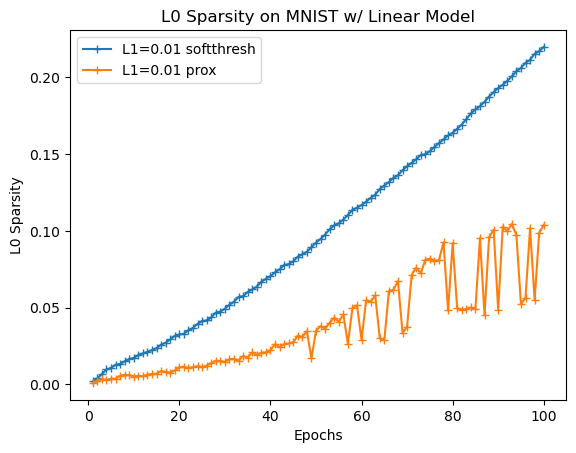

In [20]:
plt.plot(range(1, epochs+1), l0_2, marker="+", label="L1=0.01 softthresh")
plt.plot(range(1, epochs+1), l0_3, marker="+", label="L1=0.01 prox")
plt.xlabel("Epochs")
plt.ylabel("L0 Sparsity")
plt.title("L0 Sparsity on MNIST w/ Linear Model")
plt.legend()
plt.show() 

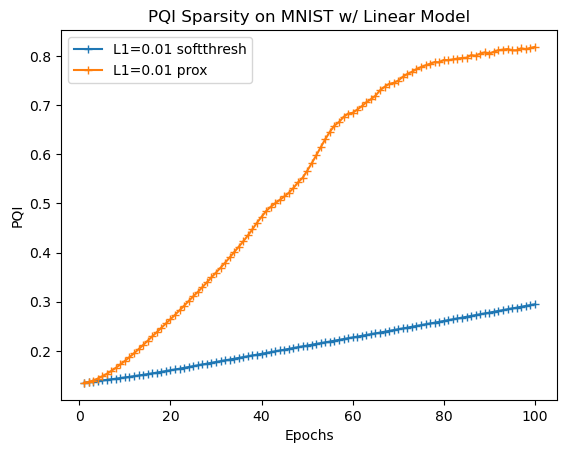

In [21]:
plt.plot(range(1, epochs+1), PQIs2, marker="+", label="L1=0.01 softthresh")
plt.plot(range(1, epochs+1), PQIs3, marker="+", label="L1=0.01 prox")
plt.xlabel("Epochs")
plt.ylabel("PQI")
plt.title("PQI Sparsity on MNIST w/ Linear Model")
plt.legend()
plt.show() 